# Case 10: Backtesting Investment Strategies (US Stocks)

## Importing the Data

In [50]:
import pandas as pd

In [51]:
pd.read_csv("dji.csv").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3333 non-null   object 
 1   Open       3333 non-null   float64
 2   High       3333 non-null   float64
 3   Low        3333 non-null   float64
 4   Close      3333 non-null   float64
 5   Adj Close  3333 non-null   float64
 6   Volume     3333 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 182.4+ KB


In [52]:
#data = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")

In [53]:
import yfinance as yf
data=yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [54]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-07-29,68259.054688,69987.539062,66532.593750,66819.914062,66819.914062,40780682628
2024-07-30,66819.054688,66987.671875,65323.191406,66201.015625,66201.015625,31380492109
2024-07-31,66201.273438,66810.210938,64532.046875,64619.250000,64619.250000,31292785994


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3608 entries, 2014-09-17 to 2024-08-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3608 non-null   float64
 1   High       3608 non-null   float64
 2   Low        3608 non-null   float64
 3   Close      3608 non-null   float64
 4   Adj Close  3608 non-null   float64
 5   Volume     3608 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 197.3 KB


In [56]:
df = data.loc["2024":, "Close"].to_frame()

In [57]:
df

,Close
Date,
2024-01-01,44167.332031
2024-01-02,44957.968750
2024-01-03,42848.175781
2024-01-04,44179.921875
2024-01-05,44162.691406
...,...
2024-07-29,66819.914062
2024-07-30,66201.015625
2024-07-31,64619.250000


## Data Visualization & Returns

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("seaborn")

C:\Users\Dell-G3\AppData\Local\Temp\ipykernel_19808\232966081.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [59]:
df.describe()

,Close
count,215.000000
mean,60128.131032
std,9600.901780
min,39507.367188
25%,52141.375000
50%,63801.199219
75%,67563.343750
max,73083.500000


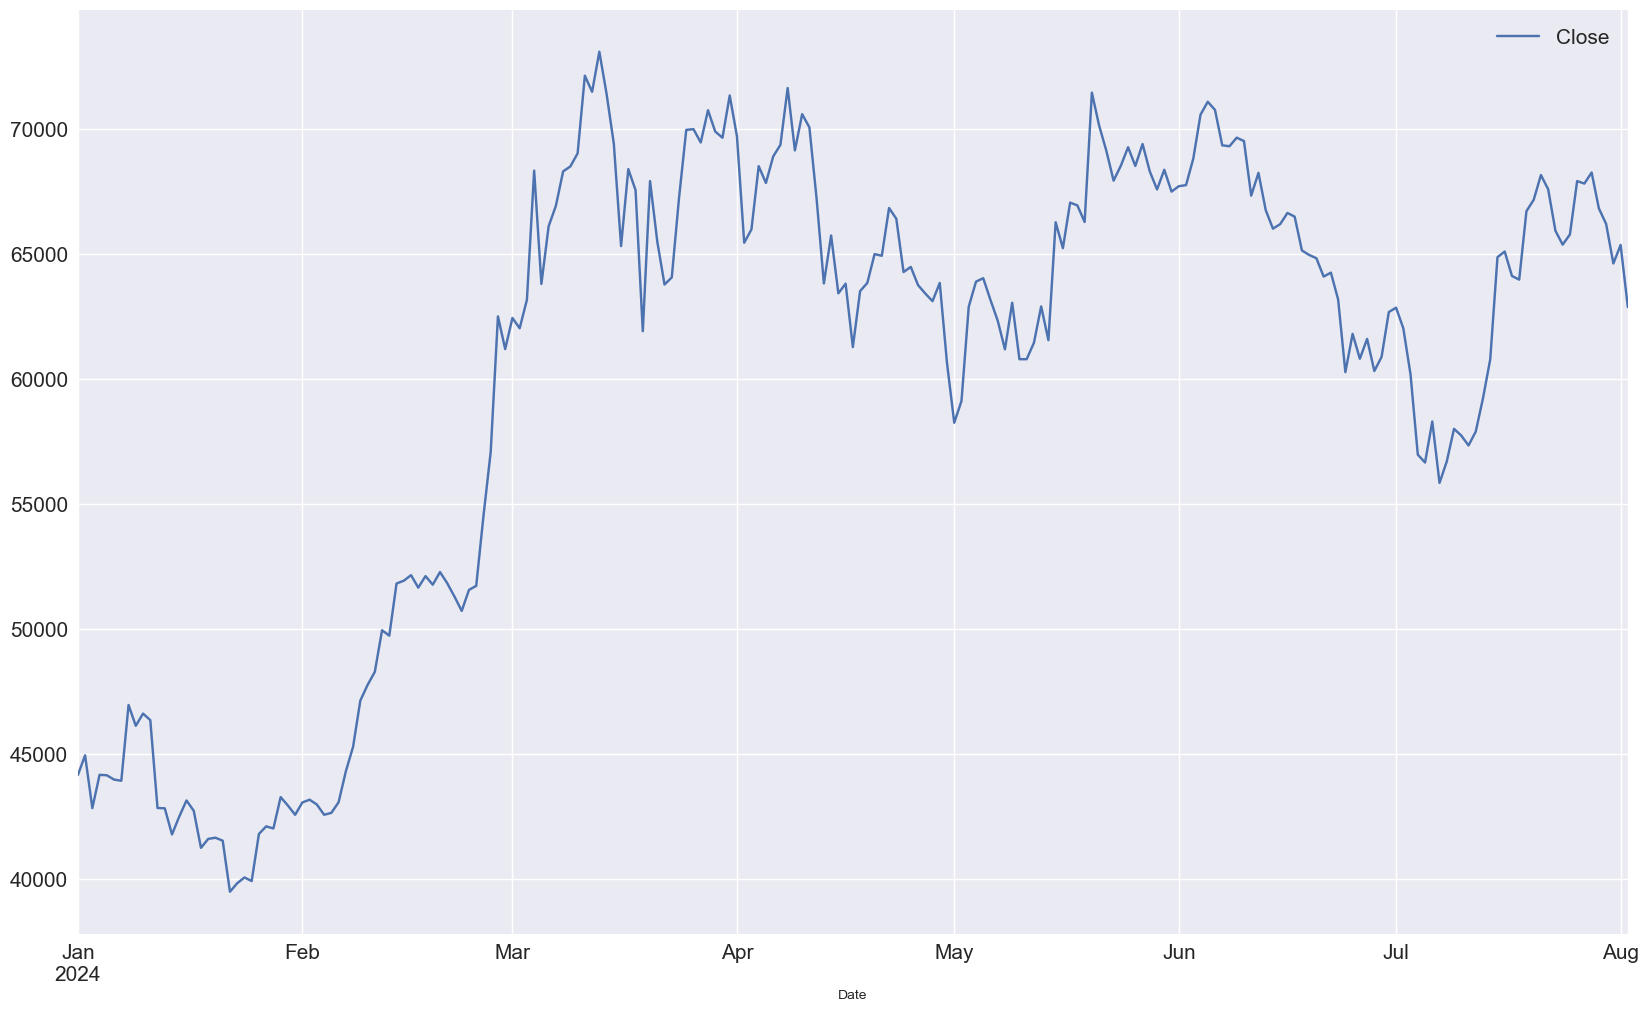

In [60]:
df.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [61]:
df["Return"] = df.pct_change()

In [62]:
df

,Close,Return
Date,,
2024-01-01,44167.332031,NaN
2024-01-02,44957.968750,0.017901
2024-01-03,42848.175781,-0.046928
2024-01-04,44179.921875,0.031081
2024-01-05,44162.691406,-0.000390
...,...,...
2024-07-29,66819.914062,-0.021038
2024-07-30,66201.015625,-0.009262
2024-07-31,64619.250000,-0.023893


In [63]:
df.dropna(inplace = True)

In [64]:
df

,Close,Return
Date,,
2024-01-02,44957.968750,0.017901
2024-01-03,42848.175781,-0.046928
2024-01-04,44179.921875,0.031081
2024-01-05,44162.691406,-0.000390
2024-01-06,43989.195312,-0.003929
...,...,...
2024-07-29,66819.914062,-0.021038
2024-07-30,66201.015625,-0.009262
2024-07-31,64619.250000,-0.023893


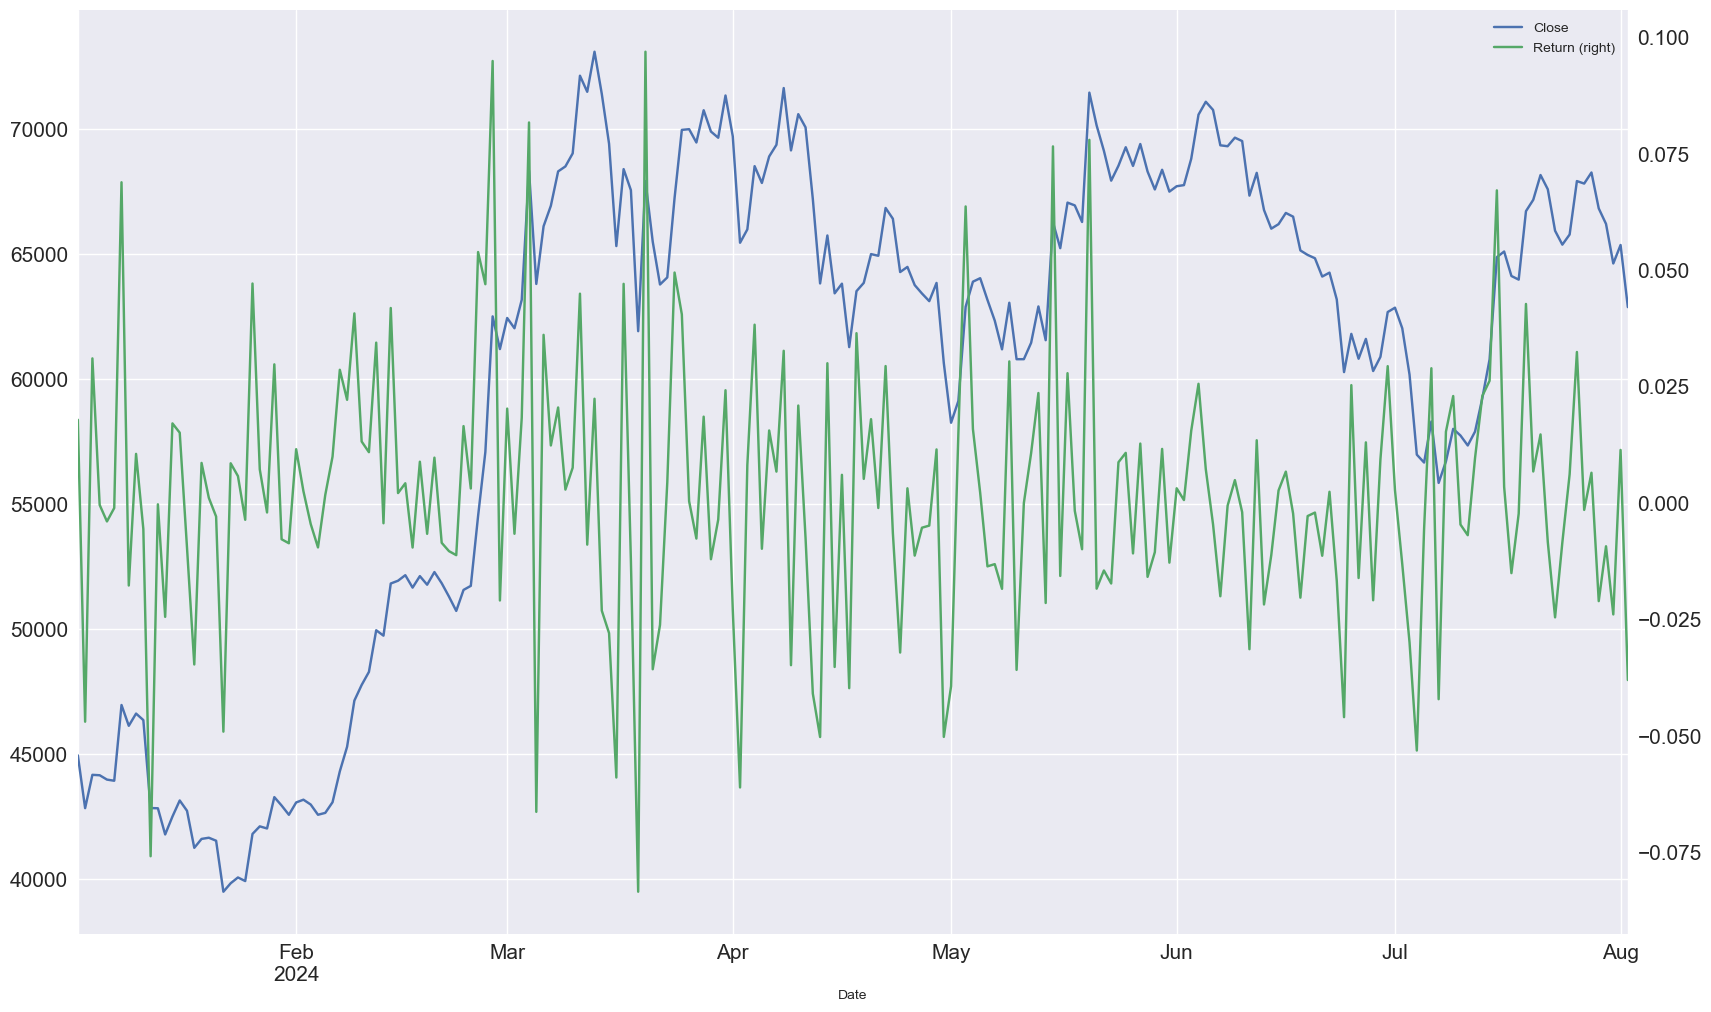

In [65]:
df.plot(figsize = (20, 12),  secondary_y = "Return", mark_right = True, fontsize = 15)
plt.show()

In [66]:
#df.rename(columns = {"Close":"DJI_Close", "Return":"DJI_Return"}, inplace = True)

In [67]:
df

,Close,Return
Date,,
2024-01-02,44957.968750,0.017901
2024-01-03,42848.175781,-0.046928
2024-01-04,44179.921875,0.031081
2024-01-05,44162.691406,-0.000390
2024-01-06,43989.195312,-0.003929
...,...,...
2024-07-29,66819.914062,-0.021038
2024-07-30,66201.015625,-0.009262
2024-07-31,64619.250000,-0.023893


## Backtesting a simple Momentum Strategy

__Positions__:

+1: Investing in DJI (__long__ position) <br>
-1: Short Selling DJI (__short__ position)<br>
0: No position (__neutral__)

__Strategies__:

-__Buy and Hold__ (Basic Strategy - passive): Initially Investing into DJI and do nothing (Position: +1 on any given day)

-__Simple Momentum__ (active Strategy to be tested): <br>
__a) Investing (+1)__ into DJI tomorrow if today´s return was __positive__ <br>
__b) Short selling (-1)__ DJI tomorrow if today´s return was __negative__

In [68]:
df

,Close,Return
Date,,
2024-01-02,44957.968750,0.017901
2024-01-03,42848.175781,-0.046928
2024-01-04,44179.921875,0.031081
2024-01-05,44162.691406,-0.000390
2024-01-06,43989.195312,-0.003929
...,...,...
2024-07-29,66819.914062,-0.021038
2024-07-30,66201.015625,-0.009262
2024-07-31,64619.250000,-0.023893


In [69]:
df["Position"] = np.sign(df["Return"])

In [70]:
df

,Close,Return,Position
Date,,,
2024-01-02,44957.968750,0.017901,1.0
2024-01-03,42848.175781,-0.046928,-1.0
2024-01-04,44179.921875,0.031081,1.0
2024-01-05,44162.691406,-0.000390,-1.0
2024-01-06,43989.195312,-0.003929,-1.0
...,...,...,...
2024-07-29,66819.914062,-0.021038,-1.0
2024-07-30,66201.015625,-0.009262,-1.0
2024-07-31,64619.250000,-0.023893,-1.0


In [71]:
df["Strategy_Ret"] = df["Position"].shift() * df["Return"]

In [72]:
df

,Close,Return,Position,Strategy_Ret
Date,,,,
2024-01-02,44957.968750,0.017901,1.0,NaN
2024-01-03,42848.175781,-0.046928,-1.0,-0.046928
2024-01-04,44179.921875,0.031081,1.0,-0.031081
2024-01-05,44162.691406,-0.000390,-1.0,-0.000390
2024-01-06,43989.195312,-0.003929,-1.0,0.003929
...,...,...,...,...
2024-07-29,66819.914062,-0.021038,-1.0,-0.021038
2024-07-30,66201.015625,-0.009262,-1.0,0.009262
2024-07-31,64619.250000,-0.023893,-1.0,0.023893


In [73]:
df.Strategy_Ret.add(1, fill_value = 0).cumprod()

Date
2024-01-02    1.000000
2024-01-03    0.953072
2024-01-04    0.923450
2024-01-05    0.923090
2024-01-06    0.926716
                ...   
2024-07-29    1.025518
2024-07-30    1.035017
2024-07-31    1.059747
2024-08-01    1.047640
2024-08-02    1.007847
Name: Strategy_Ret, Length: 214, dtype: float64

In [74]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [75]:
df

,Close,Return,Position,Strategy_Ret,Strategy
Date,,,,,
2024-01-02,44957.968750,0.017901,1.0,NaN,44957.968750
2024-01-03,42848.175781,-0.046928,-1.0,-0.046928,42848.175781
2024-01-04,44179.921875,0.031081,1.0,-0.031081,41516.429688
2024-01-05,44162.691406,-0.000390,-1.0,-0.000390,41500.237999
2024-01-06,43989.195312,-0.003929,-1.0,0.003929,41663.274466
...,...,...,...,...,...
2024-07-29,66819.914062,-0.021038,-1.0,-0.021038,46105.223881
2024-07-30,66201.015625,-0.009262,-1.0,0.009262,46532.259016
2024-07-31,64619.250000,-0.023893,-1.0,0.023893,47644.071684


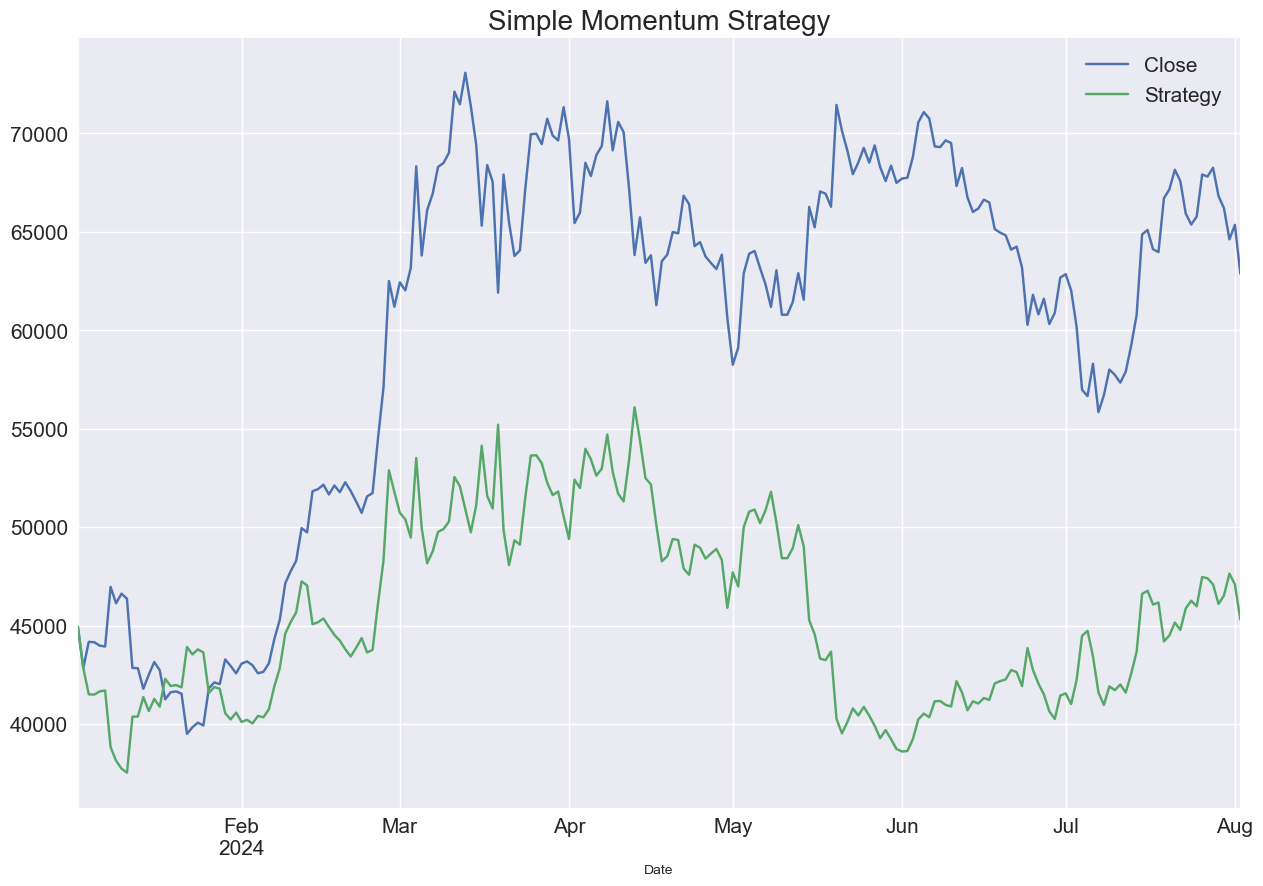

In [76]:
df[["Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.title("Simple Momentum Strategy", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()

In [77]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 214
    summary["Risk"] = summary["std"] * np.sqrt(214)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [78]:
summary_ann(df[["Return", "Strategy_Ret"]]) #The "Return" Strategy is just buy and hold, which clearly outperformed the momentum strategy "Strategy_Ret"

,Return,Risk
Return,0.437099,0.411260
Strategy_Ret,0.092420,0.412881


## Backtesting a simple Contrarian Strategy

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__Simple Contrarian__ (Strategy to be tested): <br>
__a) Short Selling (-1)__ DJI tomorrow if today´s return was __positive__ <br>
__b) Investing (+1)__ into DJI tomorrow if today´s return was __negative__

In [40]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2014-09-18,424.440002,-0.071926,1.0,NaN,424.440002
2014-09-19,394.795990,-0.069843,1.0,-0.069843,394.795990
2014-09-20,408.903992,0.035735,-1.0,0.035735,408.903992
2014-09-21,398.821014,-0.024659,1.0,0.024659,418.986969
2014-09-22,402.152008,0.008352,-1.0,0.008352,422.486391
...,...,...,...,...,...
2024-07-29,66819.914062,-0.021038,1.0,0.021038,8.116605
2024-07-30,66201.015625,-0.009262,1.0,-0.009262,8.041428
2024-07-31,64619.250000,-0.023893,1.0,-0.023893,7.849291


In [31]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2014-09-18,424.440002,-0.071926
2014-09-19,394.795990,-0.069843
2014-09-20,408.903992,0.035735
2014-09-21,398.821014,-0.024659
2014-09-22,402.152008,0.008352
...,...,...
2024-07-29,66819.914062,-0.021038
2024-07-30,66201.015625,-0.009262
2024-07-31,64619.250000,-0.023893


In [32]:
df["Position"] = -np.sign(df["DJI_Return"])

In [33]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2014-09-18,424.440002,-0.071926,1.0
2014-09-19,394.795990,-0.069843,1.0
2014-09-20,408.903992,0.035735,-1.0
2014-09-21,398.821014,-0.024659,1.0
2014-09-22,402.152008,0.008352,-1.0
...,...,...,...
2024-07-29,66819.914062,-0.021038,1.0
2024-07-30,66201.015625,-0.009262,1.0
2024-07-31,64619.250000,-0.023893,1.0


In [34]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [35]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2014-09-18,424.440002,-0.071926,1.0,NaN
2014-09-19,394.795990,-0.069843,1.0,-0.069843
2014-09-20,408.903992,0.035735,-1.0,0.035735
2014-09-21,398.821014,-0.024659,1.0,0.024659
2014-09-22,402.152008,0.008352,-1.0,0.008352
...,...,...,...,...
2024-07-29,66819.914062,-0.021038,1.0,0.021038
2024-07-30,66201.015625,-0.009262,1.0,-0.009262
2024-07-31,64619.250000,-0.023893,1.0,-0.023893


In [36]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [37]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2014-09-18,424.440002,-0.071926,1.0,NaN,424.440002
2014-09-19,394.795990,-0.069843,1.0,-0.069843,394.795990
2014-09-20,408.903992,0.035735,-1.0,0.035735,408.903992
2014-09-21,398.821014,-0.024659,1.0,0.024659,418.986969
2014-09-22,402.152008,0.008352,-1.0,0.008352,422.486391
...,...,...,...,...,...
2024-07-29,66819.914062,-0.021038,1.0,0.021038,8.116605
2024-07-30,66201.015625,-0.009262,1.0,-0.009262,8.041428
2024-07-31,64619.250000,-0.023893,1.0,-0.023893,7.849291


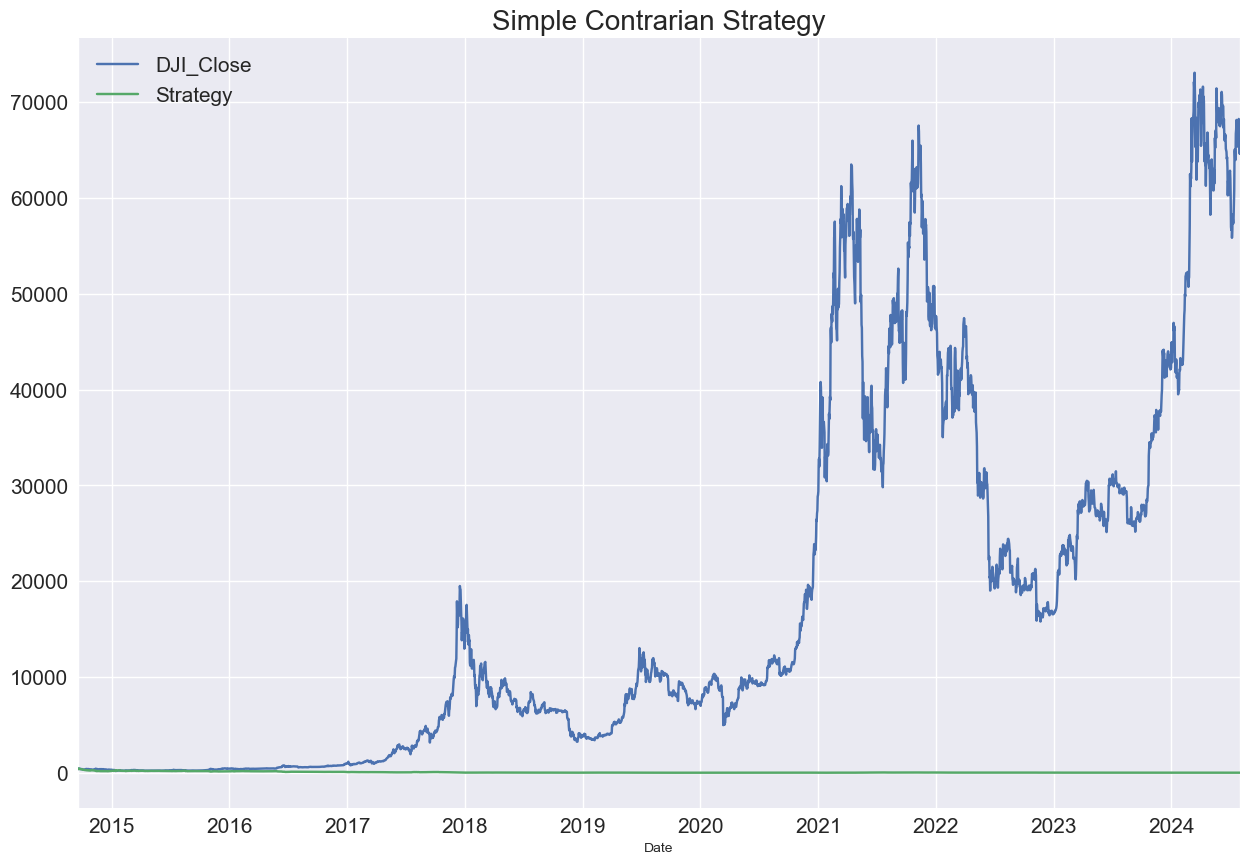

In [38]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [39]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])#Even though this contrarain momentum strategy works better than the forward momentum one, buying and holding performs better

,Return,Risk
DJI_Return,0.51548,0.579573
Strategy_Ret,-0.10778,0.580133


## More complex Strategies & Backtesting vs. Fitting

In [40]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-07-24,65927.859375,67113.984375,65146.996094,65372.132812,65372.132812,27470942309
2024-07-25,65375.875000,66112.421875,63473.472656,65777.226562,65777.226562,38315761670
2024-07-26,65771.812500,68207.601562,65743.765625,67912.062500,67912.062500,30488630457


In [41]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2014-09-18,424.440002,-0.071926
2014-09-19,394.795990,-0.069843
2014-09-20,408.903992,0.035735
2014-09-21,398.821014,-0.024659
2014-09-22,402.152008,0.008352
...,...,...
2024-07-24,65372.132812,-0.008426
2024-07-25,65777.226562,0.006197
2024-07-26,67912.062500,0.032456


In [42]:
df["Position"] = np.where(df["DJI_Return"] > 0.01, -1, 1)#This is a more general way to set the position and allows for a more flexible strategy
                                                         #if the price goes more than 1% today, tomorrow short, if it's less, then go long

In [43]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2014-09-18,424.440002,-0.071926,1
2014-09-19,394.795990,-0.069843,1
2014-09-20,408.903992,0.035735,-1
2014-09-21,398.821014,-0.024659,1
2014-09-22,402.152008,0.008352,1
...,...,...,...
2024-07-24,65372.132812,-0.008426,1
2024-07-25,65777.226562,0.006197,1
2024-07-26,67912.062500,0.032456,-1


In [106]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [107]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,1,0.003138,10606.860352
2010-01-08,10618.190430,0.001068,1,0.001068,10618.190430
2010-01-11,10663.990234,0.004313,1,0.004313,10663.990234
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1,0.113650,55396.555359
2020-03-25,21200.550781,0.023938,-1,-0.023938,54070.455264
2020-03-26,22552.169922,0.063754,-1,-0.063754,50623.249433


In [108]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [109]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,1,NaN,10572.019531
2010-01-06,10573.679688,0.000157,1,0.000157,10573.679688
2010-01-07,10606.860352,0.003138,1,0.003138,10606.860352
2010-01-08,10618.190430,0.001068,1,0.001068,10618.190430
2010-01-11,10663.990234,0.004313,1,0.004313,10663.990234
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,-1,0.113650,55396.555359
2020-03-25,21200.550781,0.023938,-1,-0.023938,54070.455264
2020-03-26,22552.169922,0.063754,-1,-0.063754,50623.249433


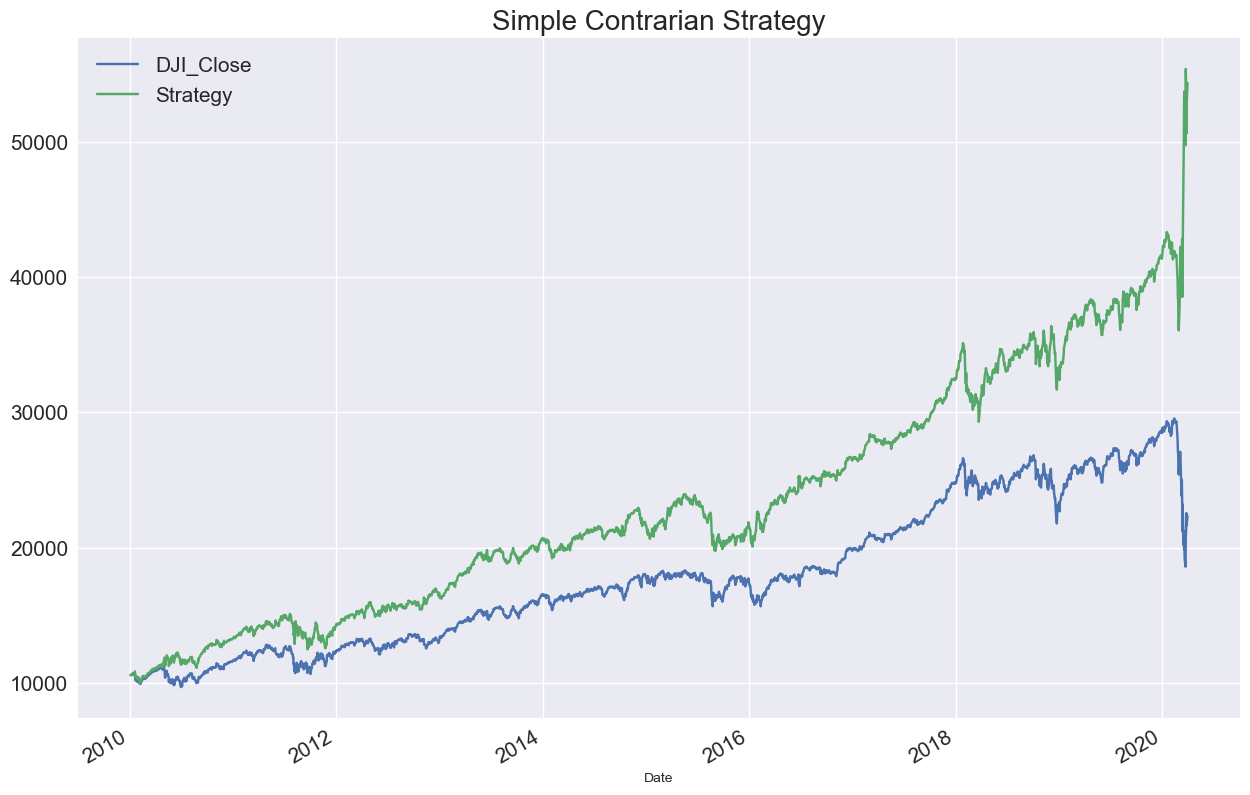

In [110]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Simple Contrarian Strategy", fontsize = 20)
plt.show()

In [112]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]]) #this mixed strategy does outperform the buy and hold strategy

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,0.174262,0.167659


Even if a Strategy __seems to outperform__ the basic Strategy, the following issues need to be considered/analyzed as well: <br>
- Backtesting vs. Fitting -> Was the Strategy __fitted__ and optimized on __historical data__? __Forward Testing__ is required!<br>
- __Transaction Costs__ -> Changing Positions trigger Cost. Include Costs!<br>
- __Tax effects__ -> Changing Positions can trigger (earlier) Tax Payments. Include Taxes!

## Simple Moving Averages (Part 1)

In [113]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [114]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [115]:
df.DJI_Close.rolling(window = 50).mean()

Date
2010-01-05             NaN
2010-01-06             NaN
2010-01-07             NaN
2010-01-08             NaN
2010-01-11             NaN
                  ...     
2020-03-24    26708.547930
2020-03-25    26554.417930
2020-03-26    26426.667930
2020-03-27    26278.799102
2020-03-30    26139.395898
Name: DJI_Close, Length: 2576, dtype: float64

In [116]:
df["SMA50"] = df.DJI_Close.rolling(window = 50).mean()

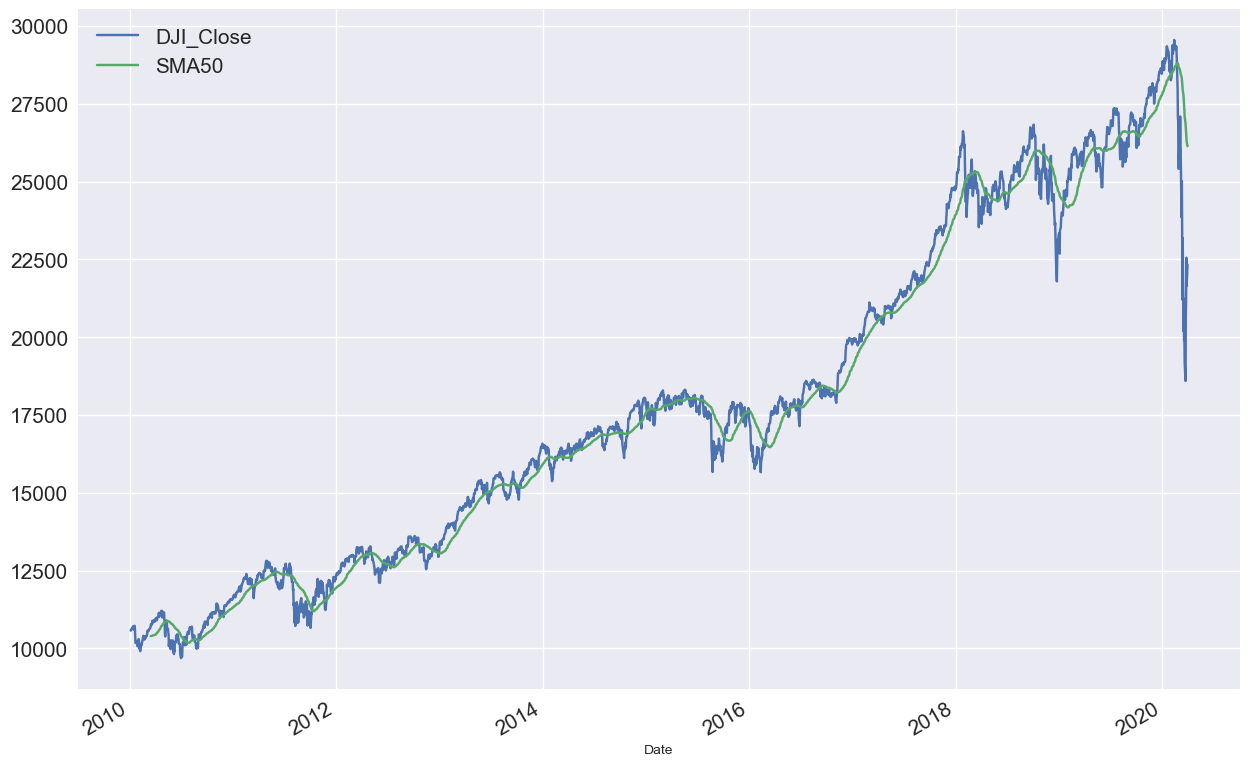

In [117]:
df[["DJI_Close", "SMA50"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [118]:
df["SMA200"] = df.DJI_Close.rolling(window = 200).mean()

In [119]:
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2010-01-05,10572.019531,-0.001128,NaN,NaN
2010-01-06,10573.679688,0.000157,NaN,NaN
2010-01-07,10606.860352,0.003138,NaN,NaN
2010-01-08,10618.190430,0.001068,NaN,NaN
2010-01-11,10663.990234,0.004313,NaN,NaN
...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566


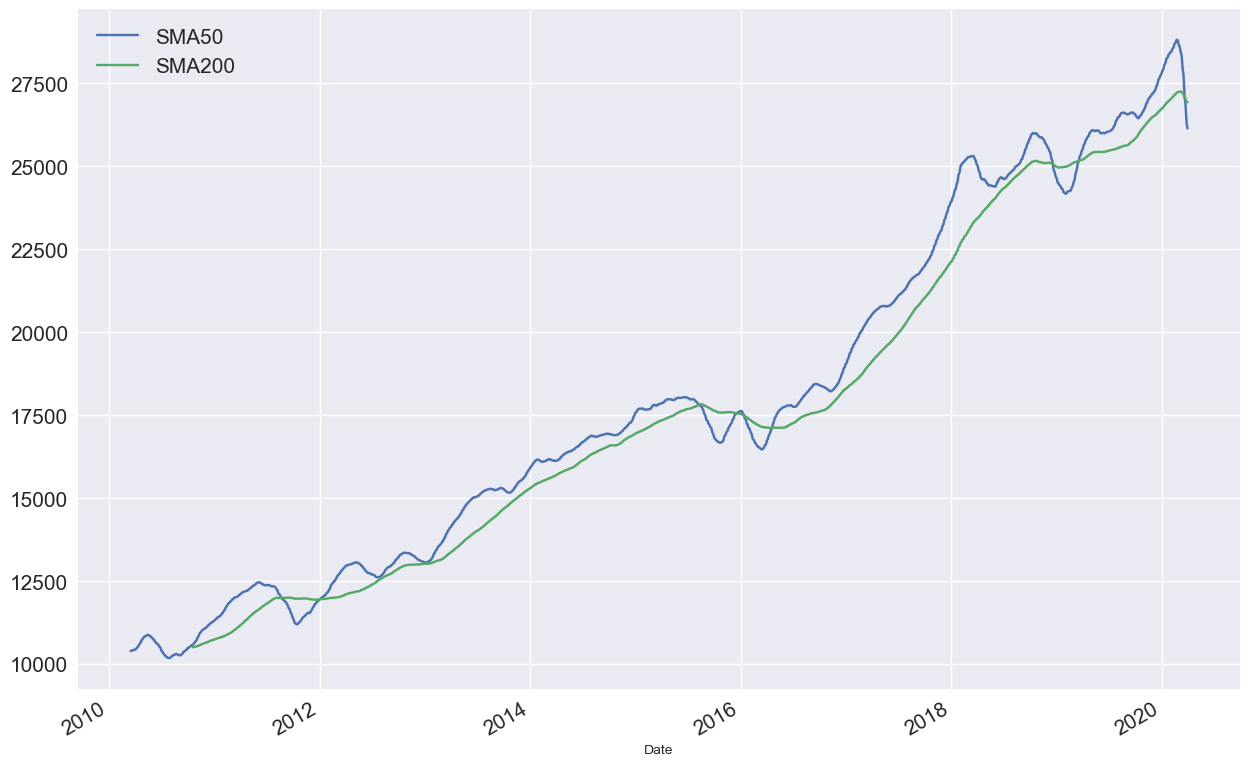

In [120]:
df[["SMA50", "SMA200"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [123]:
df.dropna(inplace= True)

In [124]:
df

,DJI_Close,DJI_Return,SMA50,SMA200
Date,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200
...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566


## Simple Moving Averages (Part 2)

__Strategies__:

-__Buy and Hold__ (Basic Strategy): Initially Investing into DJI and do nothing (Position: +1 on all days)

-__SMA Crossover (Momentum)__ (Strategy to be tested): <br>
__a) Investing (+1)__: SMA50 __>__ SMA200 <br>
__b) Short Selling (-1)__: SMA50 __<__ SMA200

In [127]:
df["Position"] = np.sign(df.SMA50.sub(df.SMA200)) 

In [128]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position
Date,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,-1.0
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,-1.0
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,-1.0


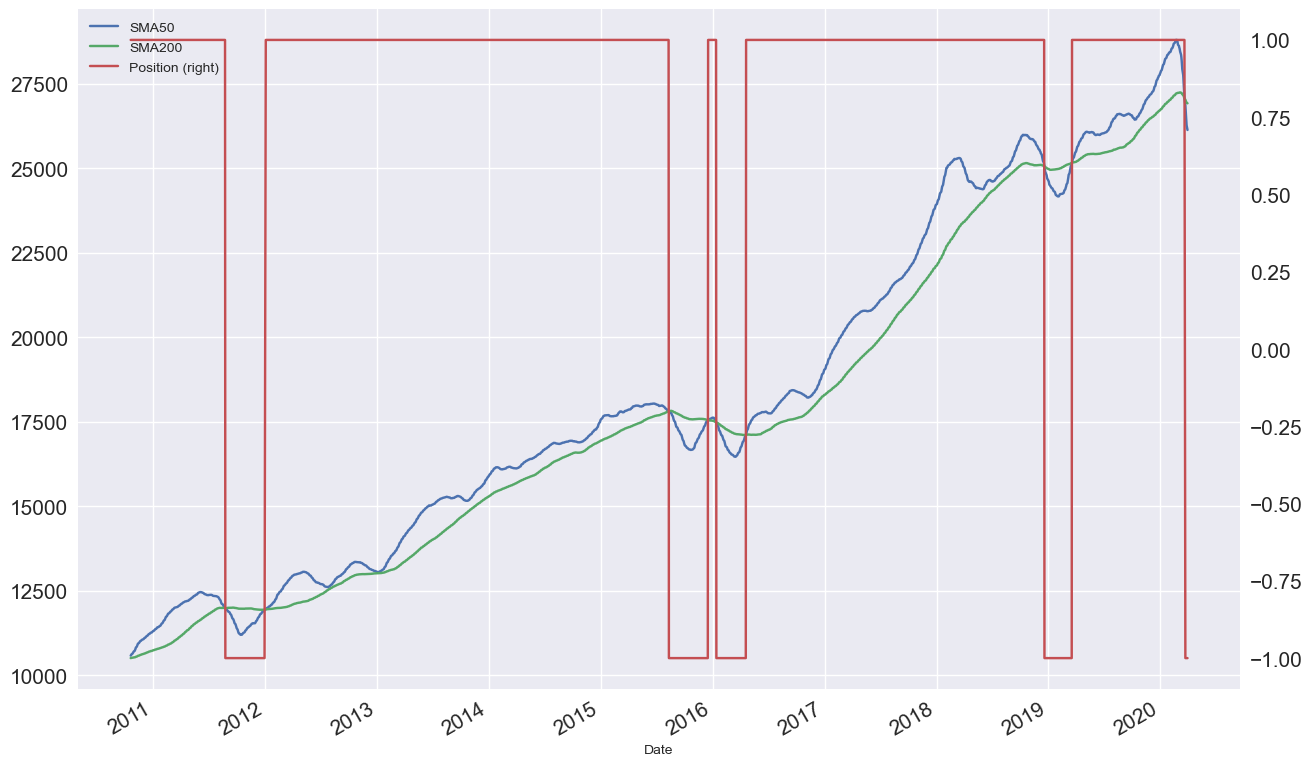

In [129]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 10), secondary_y = "Position", fontsize = 15)
plt.show()

In [130]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [131]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret
Date,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829
...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,-1.0,-0.113650
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,-1.0,-0.023938
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,-1.0,-0.063754


In [132]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [133]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,1.0,0.002829,11164.049805
...,...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,-1.0,-0.113650,8400.973271
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,-1.0,-0.023938,8199.868141
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,-1.0,-0.063754,7677.094047


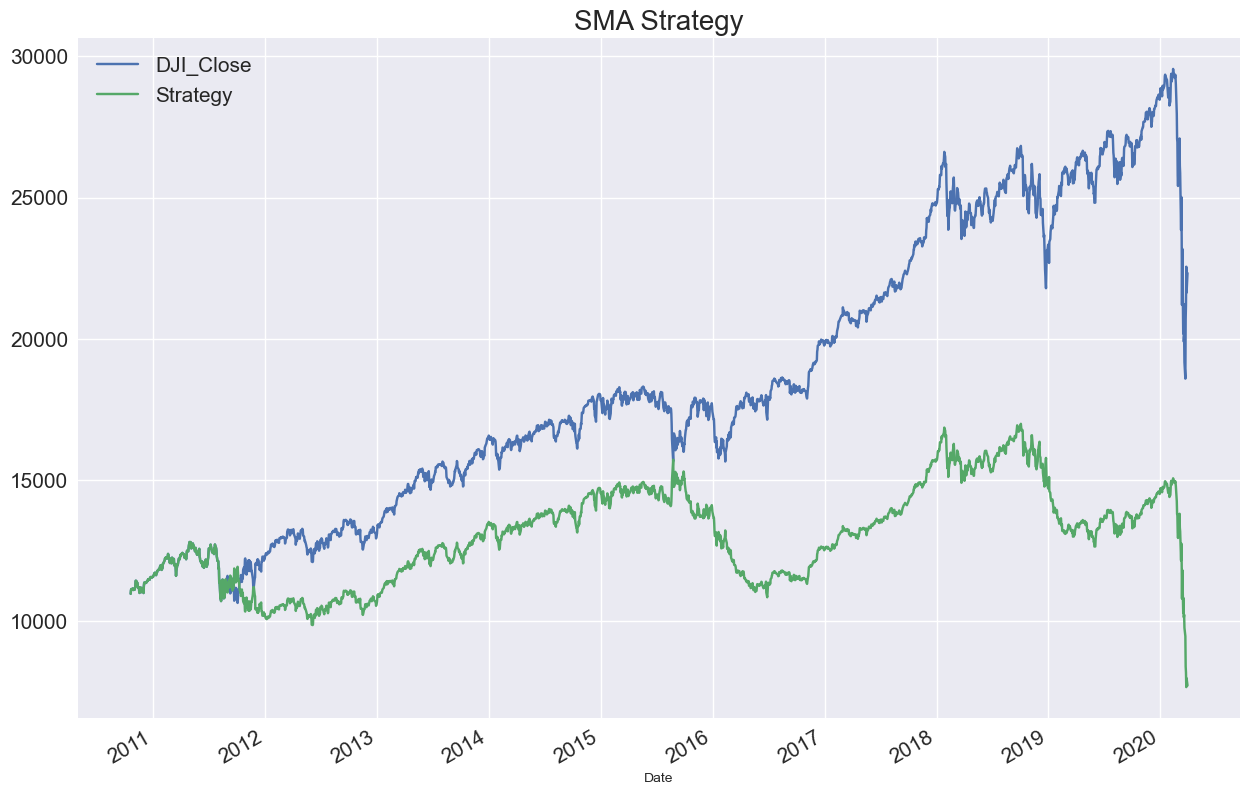

In [134]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [136]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]]) #this Crossing SMA strategy not only underperforms the buy and hold strategy, it also makes you lose money

,Return,Risk
DJI_Return,0.087819,0.167604
Strategy_Ret,-0.022887,0.167655


In [139]:
#NOW LET'S TRY WITH THE INVERSE LOGIC OF THE CROSSING SMA
df["Position"] = -np.sign(df.SMA50.sub(df.SMA200)) 

In [140]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,-0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,0.002829,11164.049805
...,...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,1.0,-0.113650,8400.973271
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,1.0,-0.023938,8199.868141
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,1.0,-0.063754,7677.094047


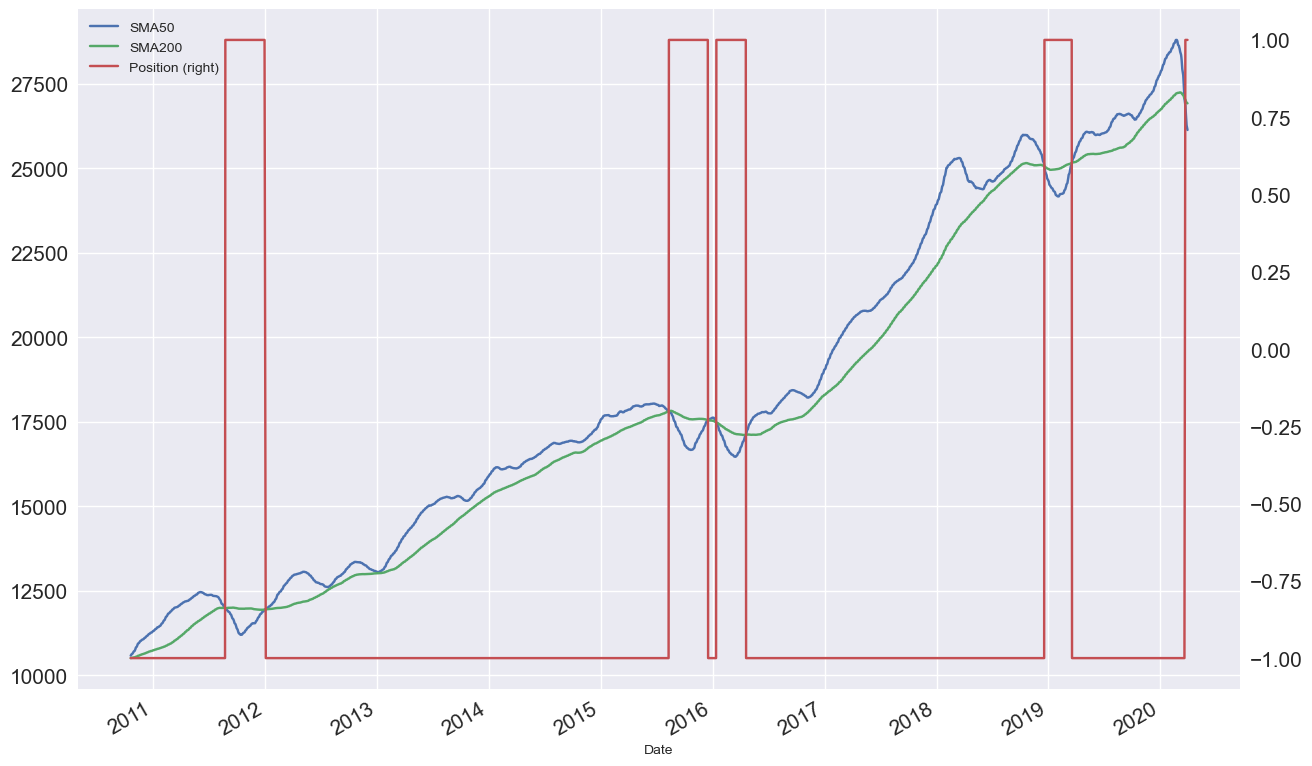

In [141]:
df[["SMA50", "SMA200", "Position"]].plot(figsize = (15, 10), secondary_y = "Position", fontsize = 15)
plt.show()

In [142]:
df["Strategy_Ret"] = df["Position"].shift() * df["DJI_Return"]

In [143]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,11107.969727
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,11146.570312
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,11132.559570
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,11164.049805
...,...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,1.0,0.113650,8400.973271
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,1.0,0.023938,8199.868141
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,1.0,0.063754,7677.094047


In [144]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [145]:
df

,DJI_Close,DJI_Return,SMA50,SMA200,Position,Strategy_Ret,Strategy
Date,,,,,,,
2010-10-19,10978.620117,-0.014813,10582.089805,10507.098203,-1.0,NaN,10978.620117
2010-10-20,11107.969727,0.011782,10591.364199,10509.777954,-1.0,-0.011782,10849.270508
2010-10-21,11146.570312,0.003475,10606.719004,10512.642407,-1.0,-0.003475,10811.568911
2010-10-22,11132.559570,-0.001257,10622.971191,10515.270903,-1.0,0.001257,10825.158571
2010-10-25,11164.049805,0.002829,10640.189180,10518.000200,-1.0,-0.002829,10794.537870
...,...,...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,26708.547930,27010.902910,1.0,0.113650,11084.154806
2020-03-25,21200.550781,0.023938,26554.417930,26986.592266,1.0,0.023938,11349.490775
2020-03-26,22552.169922,0.063754,26426.667930,26969.110566,1.0,0.063754,12073.065796


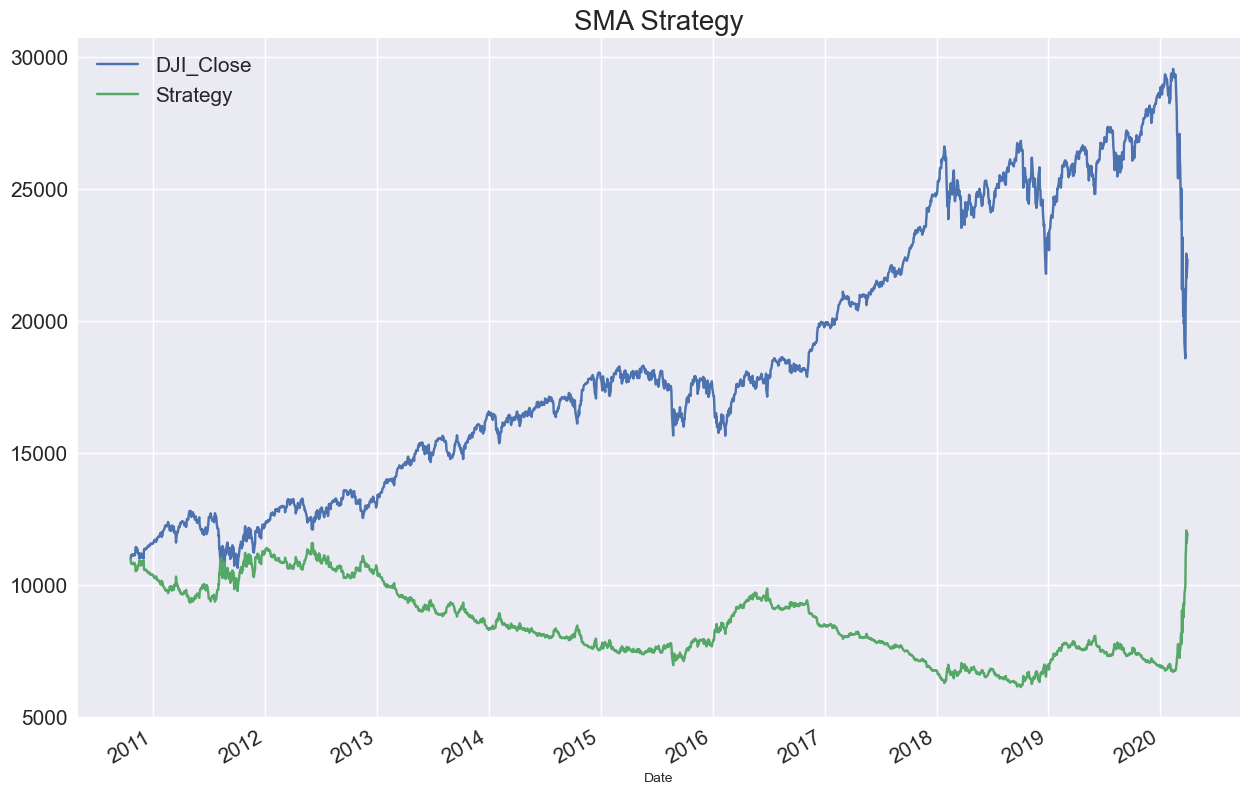

In [146]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15)
plt.legend(fontsize = 15)
plt.title("SMA Strategy", fontsize = 20)
plt.show()

In [148]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]]) #THIS ONE DOESN'T MAKE YOU LOSE MONEY BUT IT CLEARLY UNDERPERFOMRS THE BUY AND HOLD STRATEGY

,Return,Risk
DJI_Return,0.087819,0.167604
Strategy_Ret,0.022887,0.167655


## Backtesting the Perfect Strategy (...in case you can predict the future...)

In [149]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,12459.540039,12580.349609,12404.820312,12474.519531,12474.519531,327200000
2007-01-04,12473.160156,12510.410156,12403.860352,12480.690430,12480.690430,259060000
2007-01-05,12480.049805,12480.129883,12365.410156,12398.009766,12398.009766,235220000
2007-01-08,12392.009766,12445.919922,12337.370117,12423.490234,12423.490234,223500000
2007-01-09,12424.769531,12466.429688,12369.169922,12416.599609,12416.599609,225190000
...,...,...,...,...,...,...
2020-03-24,19722.189453,20737.699219,19649.250000,20704.910156,20704.910156,799340000
2020-03-25,21050.339844,22019.929688,20538.339844,21200.550781,21200.550781,796320000
2020-03-26,21468.380859,22595.060547,21427.099609,22552.169922,22552.169922,705180000


In [150]:
df = data.loc["2010":, "Close"].to_frame()
df["DJI_Return"] = df.Close.pct_change()
df.columns = ["DJI_Close", "DJI_Return"]
df.dropna(inplace = True)
df

,DJI_Close,DJI_Return
Date,,
2010-01-05,10572.019531,-0.001128
2010-01-06,10573.679688,0.000157
2010-01-07,10606.860352,0.003138
2010-01-08,10618.190430,0.001068
2010-01-11,10663.990234,0.004313
...,...,...
2020-03-24,20704.910156,0.113650
2020-03-25,21200.550781,0.023938
2020-03-26,22552.169922,0.063754


In [153]:
df["Position"] = np.sign(df["DJI_Return"]) #APPLYING THE SIMPLE FORWARD MOMENTUM STRATEGY

In [155]:
df

,DJI_Close,DJI_Return,Position
Date,,,
2010-01-05,10572.019531,-0.001128,-1.0
2010-01-06,10573.679688,0.000157,1.0
2010-01-07,10606.860352,0.003138,1.0
2010-01-08,10618.190430,0.001068,1.0
2010-01-11,10663.990234,0.004313,1.0
...,...,...,...
2020-03-24,20704.910156,0.113650,1.0
2020-03-25,21200.550781,0.023938,1.0
2020-03-26,22552.169922,0.063754,1.0


In [156]:
df["Strategy_Ret"] = df["Position"] * df["DJI_Return"] #THIS LINE IS ALMOST IDENTICAL TO THE MOMENTUM STRATEGY BUT WITHOUT THE .SHIFT(), SO IT IS EFECTIVELY 
                                                        #TAKING A POSITION IN THE RIGHT DIRECTION (BECAUSE IN THIS CASE WE ALREADY KNOW THE FINAL RESULT AT THE END OF THE DAY)

In [157]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret
Date,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128
2010-01-06,10573.679688,0.000157,1.0,0.000157
2010-01-07,10606.860352,0.003138,1.0,0.003138
2010-01-08,10618.190430,0.001068,1.0,0.001068
2010-01-11,10663.990234,0.004313,1.0,0.004313
...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,0.113650
2020-03-25,21200.550781,0.023938,1.0,0.023938
2020-03-26,22552.169922,0.063754,1.0,0.063754


In [158]:
df["Strategy"] = df.Strategy_Ret.add(1, fill_value = 0).cumprod() * df.iloc[0, 0]

In [159]:
df

,DJI_Close,DJI_Return,Position,Strategy_Ret,Strategy
Date,,,,,
2010-01-05,10572.019531,-0.001128,-1.0,0.001128,1.058395e+04
2010-01-06,10573.679688,0.000157,1.0,0.000157,1.058561e+04
2010-01-07,10606.860352,0.003138,1.0,0.003138,1.061883e+04
2010-01-08,10618.190430,0.001068,1.0,0.001068,1.063017e+04
2010-01-11,10663.990234,0.004313,1.0,0.004313,1.067602e+04
...,...,...,...,...,...
2020-03-24,20704.910156,0.113650,1.0,0.113650,1.856178e+11
2020-03-25,21200.550781,0.023938,1.0,0.023938,1.900611e+11
2020-03-26,22552.169922,0.063754,1.0,0.063754,2.021783e+11


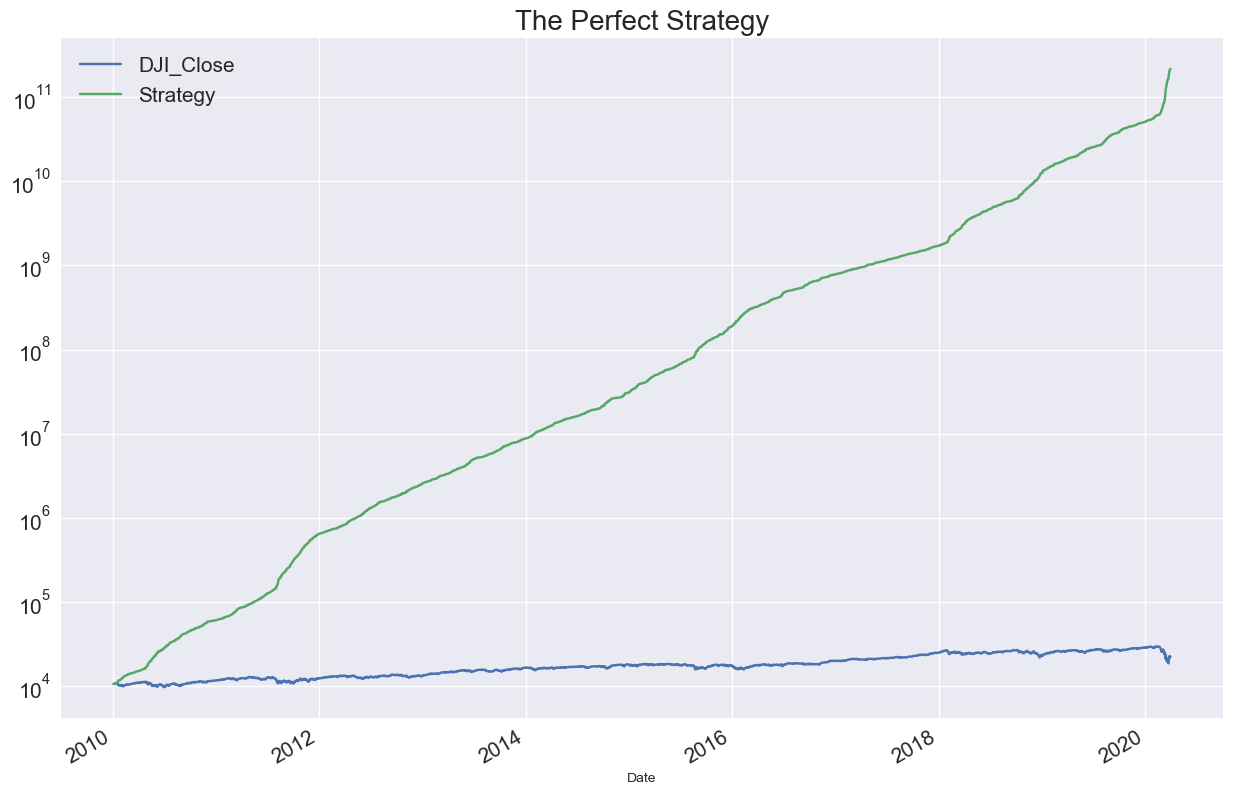

In [167]:
df[["DJI_Close", "Strategy"]].plot(figsize = (15, 10), fontsize = 15, logy = True)
plt.legend(fontsize = 15)
plt.title("The Perfect Strategy", fontsize = 20)
plt.show()

In [168]:
summary_ann(df[["DJI_Return", "Strategy_Ret"]])#OF COURSE THIS IS A FAKE STRATEGY BUT IT WOULD RETURN A LOT MORE THAN BUYING AND HOLDING

,Return,Risk
DJI_Return,0.087212,0.167896
Strategy_Ret,1.660910,0.131408
